This notebook creates Figure 1 in the [universal flu vaccine blog post](https://www.cgdev.org/blog/hhs-dont-put-all-your-vaccine-shots-egg-basket).

See the data directory for details on the included data.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
vax_raw = pd.read_csv("./Influenza_Vaccination_Coverage_for_All_Ages__6__Months__20250604.csv")

In [4]:
national_vax = vax_raw[vax_raw['Geography'] == 'United States']
end_of_season = national_vax[national_vax['Month'] == 12]
end_of_season['Dimension'] = end_of_season['Dimension'].str.replace('Greater than 6 Months flu' ,'>=6 Months')
all_trend = end_of_season[end_of_season['Dimension'] == '>=6 Months']
all_trend = all_trend[all_trend['Vaccine'] == 'Seasonal Influenza']
all_trend['year_start'] = all_trend['Season/Survey Year'].str[:4].astype(int)
all_trend = all_trend.sort_values('year_start')
all_trend['Estimate (%)'] = all_trend['Estimate (%)'].astype(float)

recent_trend = all_trend[all_trend['year_start'] >= 2017]

C:\Users\squaade\AppData\Local\Temp\ipykernel_16024\1188806251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  end_of_season['Dimension'] = end_of_season['Dimension'].str.replace('Greater than 6 Months flu' ,'>=6 Months')


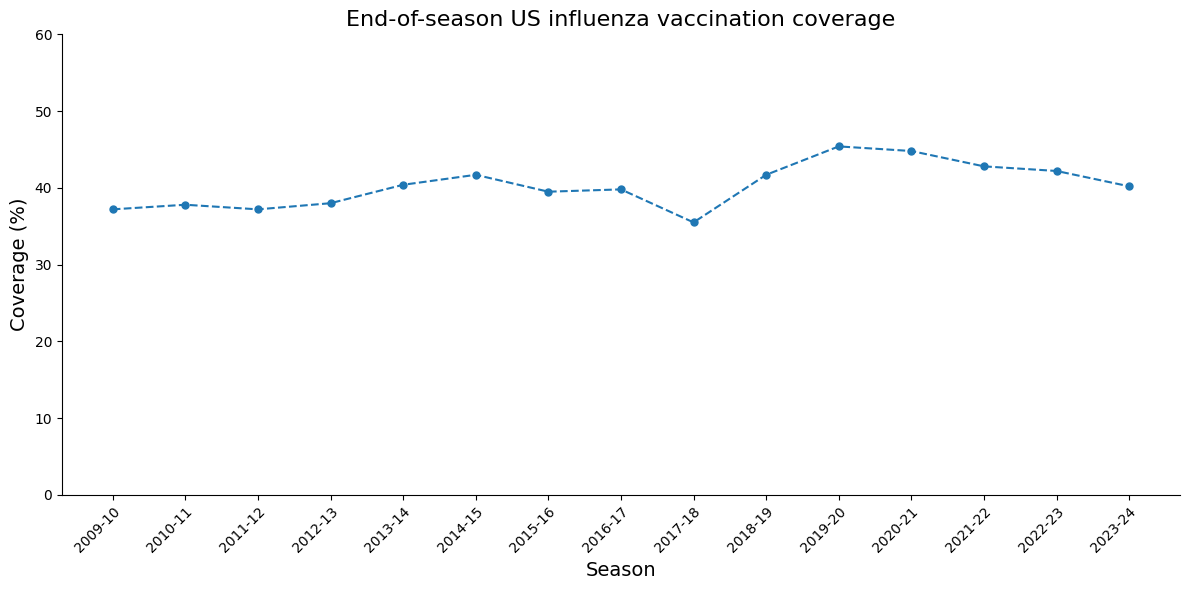

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(all_trend['Season/Survey Year'], all_trend['Estimate (%)'], linestyle='--', marker='o', markersize=5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')
plt.xlabel('Season', fontsize=14)
plt.ylabel('Coverage (%)', fontsize=14)
plt.title('End-of-season US influenza vaccination coverage', fontsize=16)
plt.ylim([0, 60])
plt.tight_layout()
plt.savefig('end_of_season_vax_coverage.png', dpi=400)
plt.show()

In [6]:
vax_eff = pd.read_excel("./Vaccine-Effectiveness-Chart-2025.xlsx", skiprows=21)
vax_eff = vax_eff.drop(columns=vax_eff.columns[vax_eff.columns.str.contains('Unnamed')])
vax_eff = vax_eff[vax_eff.notna().all(axis=1)]
vax_eff['Flu Season'] = vax_eff['Flu Season'].str.replace('††', '')

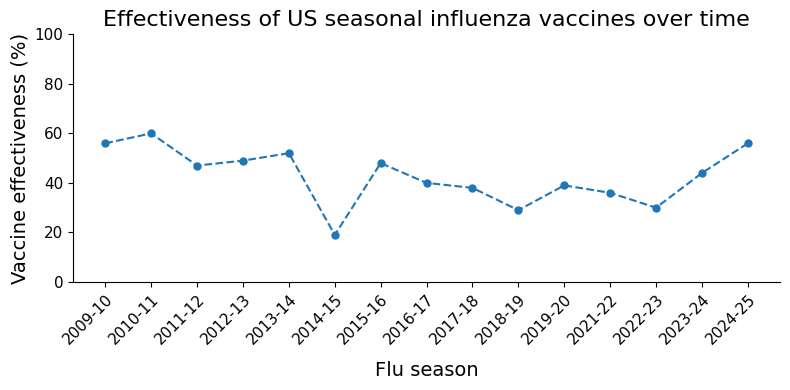

In [7]:
plt.figure(figsize=(8, 4))
plt.plot(vax_eff['Flu Season'], vax_eff['Adj. Overall VE (%)'], linestyle='--', marker='o', markersize=5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(rotation=45, rotation_mode='anchor', ha='right')
plt.xlabel('Flu season', fontsize=14, labelpad=10)
plt.ylabel('Vaccine effectiveness (%)', fontsize=14)
plt.title('Effectiveness of US seasonal influenza vaccines over time', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=11)  # Make tick labels larger
plt.ylim([0, 100])
plt.tight_layout()
plt.savefig('vax_eff_chart.png', dpi=800)
plt.show()